<a href="https://colab.research.google.com/github/SebastianOrmaechea/Python-projects/blob/main/AnyoneAI_Project_3_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anyone AI - Project III

# Home Credit Default Risk


You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all togheter. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## 1. Introduction

This is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

We will use [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `application_train.csv`: Training dataset you must use to train and find the best hyperparameters on your model.
- `application_test.csv`: Test dataset, use it only when you are done choosing the model and the parameters.
- `HomeCredit_columns_description.csv`: This file contains descriptions for the columns in train and test datasets.


**Don't change anything in this cell, just make it run correctly**

In [1]:
!pip install ipython-autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
%load_ext autotime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn import preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 158 ms (started: 2022-08-14 21:31:54 +00:00)


In [2]:
!gdown 1NXzAquurYrTSxMv6sEsWyDdty5teVg0r
!gdown 1k0rH0x2rAhHki9urSjVNS8xLwt3P-KPp
!gdown 136vZHxiyLKsyLl2iAJoSNZQQW9mZ__1J

Downloading...
From: https://drive.google.com/uc?id=1NXzAquurYrTSxMv6sEsWyDdty5teVg0r
To: /content/application_test.csv
100% 50.2M/50.2M [00:00<00:00, 171MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k0rH0x2rAhHki9urSjVNS8xLwt3P-KPp
To: /content/application_train.csv
100% 117M/117M [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=136vZHxiyLKsyLl2iAJoSNZQQW9mZ__1J
To: /content/HomeCredit_columns_description.csv
100% 24.6k/24.6k [00:00<00:00, 11.8MB/s]
time: 7.97 s (started: 2022-08-14 21:31:54 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.88 s (started: 2022-08-14 21:32:02 +00:00)


1.1. Load the training and test datasets using pandas `read_csv()` function. Assign them to `app_train` and `app_test` variables respectively.

In [4]:
### Complete in this cell: Loading the dataset
app_train  = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")

time: 7.7 s (started: 2022-08-14 21:32:04 +00:00)


**Don't change anything in this cell, just make it run correctly**

In [5]:
if app_train.shape == (215257, 123):
  print('Success: app_train shape is correct!')
else:
  raise ValueError('Train dataset shape is incorrect, please review your code')

if isinstance(app_train, pd.DataFrame):
  print('Success: app_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if app_test.shape == (92254, 123):
  print('Success: app_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(app_test, pd.DataFrame):
  print('Success: app_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!
time: 20.7 ms (started: 2022-08-14 21:32:12 +00:00)


### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1.2. Print how many samples do we have in our train and test datasets.

In [6]:
### Complete in this cell: shape of the dataset
print(app_train.shape)
print(app_test.shape)

(215257, 123)
(92254, 123)
time: 1.97 ms (started: 2022-08-14 21:32:12 +00:00)


1.3. List all columns in the train dataset.

In [7]:
### Complete in this cell: Show all columns in the training dataset 
print(app_train.columns.values)

['Unnamed: 0' 'SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER'
 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL'
 'AMT_CREDIT' 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE'
 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS'
 'NAME_HOUSING_TYPE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS'
 'REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY'
 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE'
 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG'
 'BASEMENTAREA_AVG' 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG'
 'COMMONAREA_AVG' 'ELEVATORS_AVG' 'ENTRANCE

1.4. Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [8]:
### Complete in this cell: show first 5 records in a transposed table
pd.options.display.max_rows = None
v = app_train.head(5)
v.transpose().head(5)



,0,1,2,3,4
Unnamed: 0,187399,84777,268140,270686,33785
SK_ID_CURR,317244,198357,410700,413785,139141
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,F,F


time: 50.6 ms (started: 2022-08-14 21:32:12 +00:00)


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

0    197882
1     17375
Name: TARGET, dtype: int64
0    91.928253
1     8.071747
Name: TARGET, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


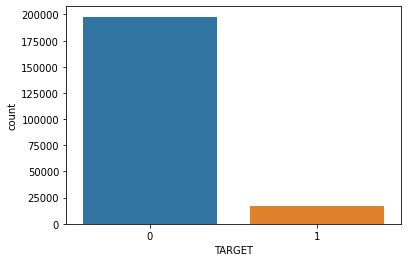

time: 658 ms (started: 2022-08-14 21:32:12 +00:00)


In [9]:
### Complete in this cell: show distribution of target variable
print(app_train.TARGET.value_counts())
print(app_train.TARGET.value_counts(normalize=True)*100)
sns.countplot(app_train.TARGET)

1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [10]:
### Complete in this cell: show number of columns per data type
s = app_train.dtypes.value_counts()
print(s.to_string())

float64    65
int64      42
object     16
time: 12.9 ms (started: 2022-08-14 21:32:13 +00:00)


1.7. For categorical variables, show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [11]:
### Complete in this cell: show number of unique values per categorical column
number_seems_categ_cols = []
threshold = 25 # I considered that all columns with less than 25 unique values, are categorical
# It is possible that categories like "family members" are not categorical
for each in app_train.columns:
    if app_train[each].nunique() < threshold:
        number_seems_categ_cols.append(each)

object_cols = app_train.select_dtypes(include=['object']).columns.to_list()
categ_cols = number_seems_categ_cols + object_cols

app_train[object_cols].nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

time: 1.57 s (started: 2022-08-14 21:32:13 +00:00)


1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [12]:
### Complete in this cell: checking missing data
missing_values = app_train.isnull().sum()
percent_missing = round(app_train.isnull().sum() * 100 / len(app_train),1)
missing_value_df = pd.DataFrame({'column_name': app_train.columns,'Total':missing_values,
                                 'Percent': percent_missing})
missing_value_df.set_index('column_name', inplace=True)
Miss = missing_value_df.sort_values(by="Percent", ascending=False).head(20)
print(Miss.to_string())

                           Total  Percent
column_name                              
COMMONAREA_AVG            150393     69.9
COMMONAREA_MODE           150393     69.9
COMMONAREA_MEDI           150393     69.9
NONLIVINGAPARTMENTS_MODE  149483     69.4
NONLIVINGAPARTMENTS_AVG   149483     69.4
NONLIVINGAPARTMENTS_MEDI  149483     69.4
FONDKAPREMONT_MODE        147217     68.4
LIVINGAPARTMENTS_MODE     147144     68.4
LIVINGAPARTMENTS_MEDI     147144     68.4
LIVINGAPARTMENTS_AVG      147144     68.4
FLOORSMIN_MODE            146070     67.9
FLOORSMIN_AVG             146070     67.9
FLOORSMIN_MEDI            146070     67.9
YEARS_BUILD_AVG           143149     66.5
YEARS_BUILD_MODE          143149     66.5
YEARS_BUILD_MEDI          143149     66.5
OWN_CAR_AGE               142017     66.0
LANDAREA_MEDI             127983     59.5
LANDAREA_MODE             127983     59.5
LANDAREA_AVG              127983     59.5
time: 818 ms (started: 2022-08-14 21:32:14 +00:00)


**Analyzing distribution of variables**

1.9. Show the distribution of credit amounts.

Text(0.5, 1.0, 'Distribution of credit amounts')

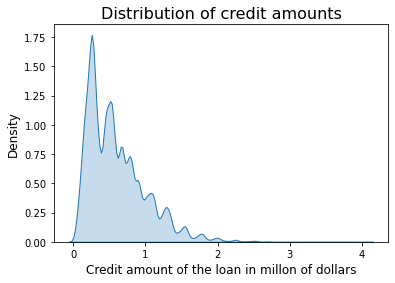

time: 2.89 s (started: 2022-08-14 21:32:15 +00:00)


In [13]:
### Complete in this cell: distribution of credit amounts
app_train.columns[app_train.columns.str.contains('cred', case = False)] # For detect the column with credit amounts

sns.kdeplot(app_train.AMT_CREDIT/1000000, shade=True)
plt.xlabel('Credit amount of the loan in millon of dollars', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of credit amounts', fontsize=16)


1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

Secondary / secondary special    153062
Higher education                  52283
Incomplete higher                  7166
Lower secondary                    2634
Academic degree                     112
Name: NAME_EDUCATION_TYPE, dtype: int64


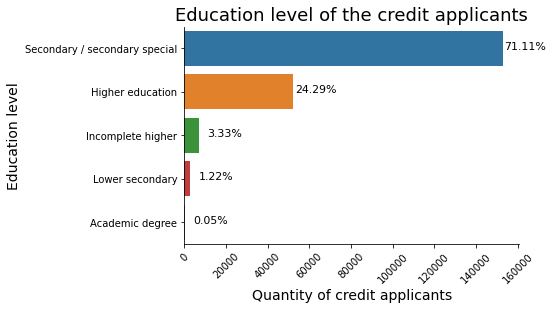

time: 755 ms (started: 2022-08-14 21:32:18 +00:00)


In [14]:
### Complete in this cell: level of education plot
app_train.columns[app_train.columns.str.contains('educ', case = False)] # For detect the column with education level
print(app_train.NAME_EDUCATION_TYPE.value_counts())
order= app_train['NAME_EDUCATION_TYPE'].value_counts().index
ax = sns.countplot(y=app_train.NAME_EDUCATION_TYPE , orient = 'h', order=order)
plt.xlabel('Quantity of credit applicants', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Education level', fontsize=14)
plt.title('Education level of the credit applicants', fontsize=18)
sns.despine()
for p in ax.patches:
    ax.annotate(str(round(p.get_width()/len(app_train)*100, 2)) + '%',((p.get_x() + p.get_width()), p.get_y()), xytext=(43, -18),fontsize=11,
                textcoords='offset points', horizontalalignment='right')

1.11. Plot the distribution of ocupation of the loan applicants

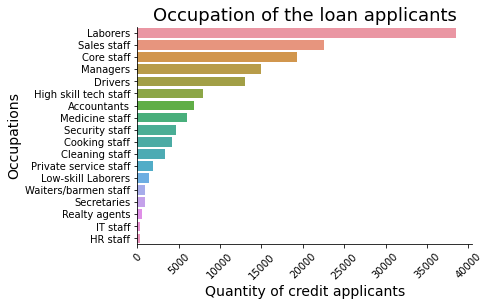

time: 864 ms (started: 2022-08-14 21:32:19 +00:00)


In [15]:
### Complete in this cell: ocupation of applicants
app_train.columns[app_train.columns.str.contains('occup', case = False)] # For detect the column with occupations

order= app_train['OCCUPATION_TYPE'].value_counts().index
ax = sns.countplot(y=app_train.OCCUPATION_TYPE , orient = 'h', order=order)
plt.xlabel('Quantity of credit applicants', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Occupations', fontsize=14)
plt.title('Occupation of the loan applicants', fontsize=18)
sns.despine()

1.12. Plot the family status of the applicants

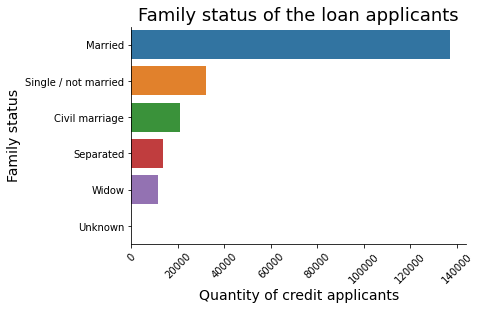

time: 1.24 s (started: 2022-08-14 21:32:20 +00:00)


In [16]:
### Complete in this cell: family status
app_train.columns[app_train.columns.str.contains('family', case = False)] # For detect the column with family status

order= app_train['NAME_FAMILY_STATUS'].value_counts().index
ax = sns.countplot(y=app_train.NAME_FAMILY_STATUS , orient = 'h', order=order)
plt.xlabel('Quantity of credit applicants', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Family status', fontsize=14)
plt.title('Family status of the loan applicants', fontsize=18)
sns.despine()

1.13. Plot the income type of applicants grouped by the target variable

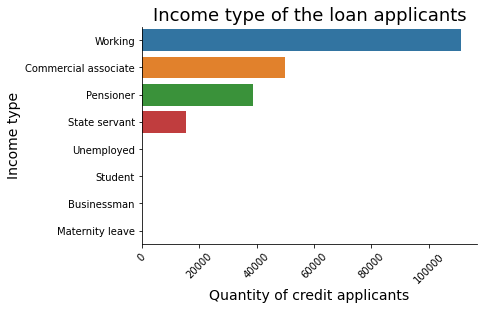

time: 1.19 s (started: 2022-08-14 21:32:21 +00:00)


In [17]:
### Complete in this cell: income type 
app_train.columns[app_train.columns.str.contains('income', case = False)] # For detect the column with income type

order= app_train['NAME_INCOME_TYPE'].value_counts().index
ax = sns.countplot(y=app_train.NAME_INCOME_TYPE , orient = 'h', order=order)
plt.xlabel('Quantity of credit applicants', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Income type', fontsize=14)
plt.title('Income type of the loan applicants', fontsize=18)
sns.despine()

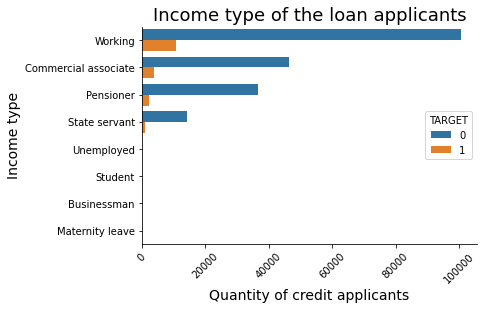

time: 1.77 s (started: 2022-08-14 21:32:22 +00:00)


In [18]:
### Complete in this cell: Income type of applicants by target variable
order= app_train['NAME_INCOME_TYPE'].value_counts().index
ax = sns.countplot(y=app_train.NAME_INCOME_TYPE , orient = 'h', order=order, hue=app_train.TARGET)
plt.xlabel('Quantity of credit applicants', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Income type', fontsize=14)
plt.title('Income type of the loan applicants', fontsize=18)
sns.despine()

## 2. Preprocessing

2.1. The first step will be separate our train and test datasets columns between Features and Targets.

- Assign to `X_train` those columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).


In [19]:
### Complete in this cell
X_train = app_train.loc[:, app_train.columns !="TARGET"]
y_train = app_train.TARGET
X_test = app_test.loc[:, app_test.columns !="TARGET"]
y_test = app_test.TARGET

time: 1.24 s (started: 2022-08-14 21:32:24 +00:00)


**Don't change anything in this cell, just make it run correctly**

In [20]:
if X_train.shape == (215257, 122):
  print('Success: X_train shape is correct!')
else:
  raise ValueError('X_train dataset shape is incorrect, please review your code')

if isinstance(X_train, pd.DataFrame):
  print('Success: X_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if y_train.shape == (215257,) or y_train.shape == (215257, 1):
  print('Success: y_train shape is correct!')
else:
  raise ValueError('Train labels shape is incorrect, please review your code')

if X_test.shape == (92254, 122):
  print('Success: X_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(X_test, pd.DataFrame):
  print('Success: X_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

if y_test.shape == (92254,) or y_test.shape == (92254, 1):
  print('Success: y_test shape is correct!')
else:
  raise ValueError('Test labels shape is incorrect, please review your code')


Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!
time: 56.9 ms (started: 2022-08-14 21:32:25 +00:00)


2.2. In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

**Important note:** Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns. Check `pandas.DataFrame.align()` function.

Complete the function `preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame)` following the instructions given above.

In [27]:
### Complete in this cell: Data pre processing function
def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame):
  X_train_processed = X_train.copy()
  X_train_processed.loc[X_train_processed["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = X_train_processed[X_train_processed["DAYS_EMPLOYED"] < 0]["DAYS_EMPLOYED"].median()
  
  num_cols = X_train.select_dtypes('number').columns
  for col in num_cols:
    X_train_processed[col].fillna(value=X_train_processed[col].median(), inplace=True)
  
  Scaler = preprocessing.RobustScaler()
  X_train_processed[num_cols] = Scaler.fit_transform(X_train_processed[num_cols])
  
  for col in object_cols:
    imputer = SimpleImputer(strategy="most_frequent")
    X_train_processed[[col]] = imputer.fit_transform(X_train_processed[[col]])
  transformer = make_column_transformer((OneHotEncoder(drop="if_binary", handle_unknown='ignore'), object_cols), remainder='passthrough')
  transformed_train = transformer.fit_transform(X_train_processed)
  transformed_df_train = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

  X_test_processed = X_test.copy()
  X_test_processed.loc[X_test_processed["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = X_test_processed[X_test_processed["DAYS_EMPLOYED"] < 0]["DAYS_EMPLOYED"].median()
  
  for col in num_cols:
    X_test_processed[col].fillna(value=X_test_processed[col].median(), inplace=True)
  
  X_test_processed[num_cols] = Scaler.transform(X_test_processed[num_cols])
  
  for col in object_cols:
    X_test_processed[[col]] = imputer.transform(X_test_processed[[col]])
  transformed_test = transformer.transform(X_test_processed)
  transformed_df_test = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())
  
  train_data = np.array(transformed_df_train)
  test_data = np.array(transformed_df_test)
    
  return train_data, test_data

time: 34.9 ms (started: 2022-08-14 21:39:47 +00:00)


In the following cell we are going to execute the functions you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `test_data` only for the final evaluation of the model trained.

**Don't change anything in this cell, just make it run correctly**

In [28]:
train_data, test_data = preprocess_data(X_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- NAME_CONTRACT_TYPE
Feature names seen at fit time, yet now missing:
- EMERGENCYSTATE_MODE

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER
Feature names seen at fit time, yet now missing:
- EMERGENCYSTATE_MODE

  warnings.warn(message, FutureWarning)
/usr/local/lib

time: 7.59 s (started: 2022-08-14 21:39:49 +00:00)


**Don't change anything in this cell, just make it run correctly**

In [29]:
if train_data.shape == (215257, 242):
  print('Success: train_data shape is correct!')
else:
  raise ValueError('train_data dataset shape is incorrect, please review your code')

if isinstance(train_data, np.ndarray):
  print('Success: train_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if test_data.shape == (92254, 242):
  print('Success: test_data shape is correct!')
else:
  raise ValueError('test_data dataset shape is incorrect, please review your code')

if isinstance(test_data, np.ndarray):
  print('Success: test_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')


Success: train_data shape is correct!
Success: train_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!
time: 7.47 ms (started: 2022-08-14 21:40:05 +00:00)


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

In [30]:
### Complete in this cell: train a logistic regression, assign to `log_reg` variable
log_reg = LogisticRegression(max_iter=1000, C=0.1, random_state=1).fit(train_data, y_train)

time: 2min 33s (started: 2022-08-14 21:40:43 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Don't change anything in this cell, just make it run correctly**

In [31]:
if isinstance(log_reg, LogisticRegression):
  print('Success: Logistic regression model type is correct!')
else:
  raise ValueError('Logistic regression model type is incorrect, please review your code')

Success: Logistic regression model type is correct!
time: 4.66 ms (started: 2022-08-14 21:43:26 +00:00)


3.2. Use the trained model to predict probabilities for the test data.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1).

In [32]:
### Complete in this cell: predict test data

Pred_probs = log_reg.predict_proba(test_data)[:, 1]

time: 66.7 ms (started: 2022-08-14 21:43:32 +00:00)


3.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [33]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `lr_roc_auc` variable.
lr_roc_auc = roc_auc_score(y_test, Pred_probs)
lr_roc_auc

0.7425212357021275

time: 42.6 ms (started: 2022-08-14 21:43:54 +00:00)


At this point, the model should produce a result around 0.67 

**Don't change anything in this cell, just make it run correctly**

In [34]:
if isinstance(lr_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if lr_roc_auc >= 0.63:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!
time: 4.07 ms (started: 2022-08-14 21:44:39 +00:00)


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [35]:
### Complete in this cell: train a RandomForestClassifier
### Assgign to `rf`
rf = RandomForestClassifier(random_state=42, n_jobs=-1).fit(train_data, y_train)


time: 2min 49s (started: 2022-08-14 21:45:05 +00:00)


3.5. Use the classifier to predict probabilities on the test set.



In [36]:
### Complete in this cell: predict test data and store in
Pred_probs_RF = rf.predict_proba(test_data)[:, 1]

time: 3.17 s (started: 2022-08-14 21:47:59 +00:00)


3.6. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [37]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_roc_auc` variable.
rf_roc_auc = roc_auc_score(y_test, Pred_probs_RF)
rf_roc_auc

0.7094851570886392

time: 35.6 ms (started: 2022-08-14 21:48:06 +00:00)


At this point, the model should produce a result around 0.7

**Don't change anything in this cell, just make it run correctly**

In [38]:
if isinstance(rf_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_roc_auc >= 0.66:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!
time: 8.88 ms (started: 2022-08-14 21:49:42 +00:00)


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


3.7. Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

Assign the trained model to `rf_random` variable.

In [39]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination 
### of hyperparameters for a RandomForestClassifier.
### Assign the model to `rf_random`
n_estimators = [10, 50, 100]
criterion = ["gini", "entropy"]
rf_grid = dict(n_estimators=n_estimators, criterion=criterion)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_grid, n_iter=3, cv=3, scoring="roc_auc", random_state=42).fit(train_data, y_train)

time: 10min 25s (started: 2022-08-14 21:49:51 +00:00)


In [40]:
rf_random.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

time: 5.6 ms (started: 2022-08-14 22:00:24 +00:00)


3.8. Use the classifier to predict probabilities on the test set.


In [41]:
### Complete in this cell: predict test data and save csv
Pred_probs_R_Search = rf_random.predict_proba(test_data)[:, 1]
Pred_probs_R_Search_df = pd.DataFrame(Pred_probs_R_Search)
Pred_probs_R_Search_df.to_csv("Pred_probs_R_Search.csv")

time: 3.89 s (started: 2022-08-14 22:00:27 +00:00)


3.9. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_tuned_roc_auc` variable.

In [42]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_tuned_roc_auc` variable.
rf_tuned_roc_auc = roc_auc_score(y_test, Pred_probs_R_Search)
rf_tuned_roc_auc

0.7208792228047999

time: 35.3 ms (started: 2022-08-14 22:00:49 +00:00)


At this point, the model should produce a result around 0.7 or higher.

**Don't change anything in this cell, just make it run correctly**

In [43]:
if isinstance(rf_tuned_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_tuned_roc_auc >= 0.7:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!
time: 8.2 ms (started: 2022-08-14 22:01:51 +00:00)


3.10. Optional: If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

In [44]:
# First I test the RandomForestClassifier with balanced class weights. It shows a better ROC score 
rf_class_bal = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced", criterion='entropy').fit(train_data, y_train)
Preds_class_bal = rf_class_bal.predict_proba(test_data)[:, 1]
Class_bal_roc_auc = roc_auc_score(y_test, Preds_class_bal)
Class_bal_roc_auc 

0.7235955162618959

time: 2min 26s (started: 2022-08-14 22:01:57 +00:00)


In [46]:
# The next code considers weighted classes and bigger sizes of n_estimators
rf_grid = dict(n_estimators=[100, 125, 150, 175])
rf_random_opt = RandomizedSearchCV(rf_class_bal, param_distributions=rf_grid, n_iter=4, cv=3, scoring="roc_auc", random_state=42).fit(train_data, y_train)
Preds_rf_random_opt = rf_random_opt.predict_proba(test_data)[:, 1]
rf_random_opt_roc_auc = roc_auc_score(y_test, Preds_rf_random_opt)
rf_random_opt_roc_auc 

0.734704150019516

time: 32min 5s (started: 2022-08-14 22:10:08 +00:00)


### Optional: Training a LightGBM model 

3.11. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [45]:
### Complete in this cell: train a LightGBM model
LightGBM_model = lgb.LGBMClassifier(random_state=22)                 
LightGBM_model.fit(train_data, y_train)

Preds_LGB = LightGBM_model.predict_proba(test_data)[:, 1]
LGB_roc_auc = roc_auc_score(y_test, Preds_LGB)
LGB_roc_auc 

0.7560860352604616

time: 15.9 s (started: 2022-08-14 22:06:06 +00:00)


### Optional: Using Scikit Learn Pipelines 

3.12. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training
